## **VISÃO COMPUTACIONAL - PROVA PI - 30/09/2021**











**NOME:** Victor Vergara Arcoverde de Albuquerque Cavalcanti

**PROBLEMA 1 (2.0 PONTOS).** Considere o seguinte trecho de código em OpenCV e PyWavelet. O que faz este código ?

In [ ]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow
import pywt
img = cv.cvtColor(cv.imread('lena.png'), cv.COLOR_BGR2GRAY)
coefs = pywt.dwt2(img,'haar')
LL, (LH, HL, HH) = coefs
R=np.maximum(np.maximum(LH,HL),HH)

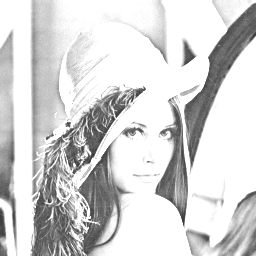

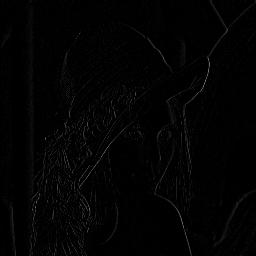

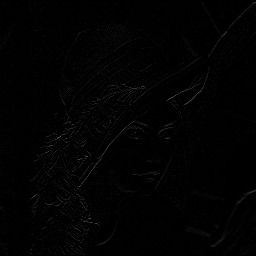

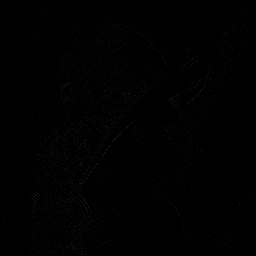

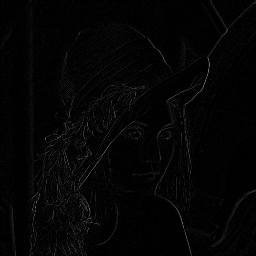

In [ ]:
#coloque sua resposta aqui no formato de comentário. Use código, se achar necessário. 
cv2_imshow(LL)
cv2_imshow(HL)
cv2_imshow(LH)
cv2_imshow(HH)
cv2_imshow(R)

# o código acima faz a Transformada De Wavelet da familia 'haar' para a imagem 'lena.png', assim se obtem o LL, LH, HL e HH após a primeira interação.
# Depois o código junta os contornos de LH, HL e HH, pegando os maiores valores de cada uma a fim de ter o contorno mais completo da imagem

**PROBLEMA 2 (2.0 PONTOS).** Considere a função abaixo, que recebe quatro parâmetros: uma imagem em níveis de cinza, a coordenada de uma pixel (x,y) e um valor T.

In [ ]:
def enigma(img,x,y,T):
  if abs(img[x+1][y]-img[x][y])>=T:
    return 255
  else:
    return 0

Utilize esta função para calcular um contorno da imagem lena.png, lida no código abaixo:

(512, 512, 3)


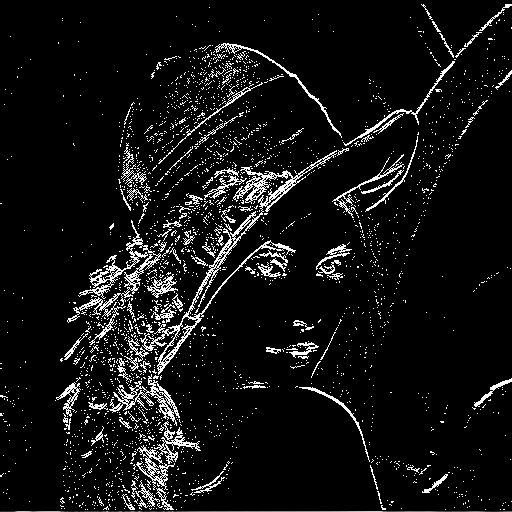

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
print(img.shape)
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.int32)
img_contorno = imgg.copy()
lin,col=imgg.shape
T=14
for l in range(lin-1):
  for c in range(col):
    img_contorno[l,c]=enigma(imgg,l,c,T)
cv2_imshow(img_contorno)


**PROBLEMA 3 (3.0 PONTOS).** A subtração de background (fundo) é uma técnica muito comum para detectar objetos em movimentação em uma cena. Seu esquema de implementação é mostrado abaixo.

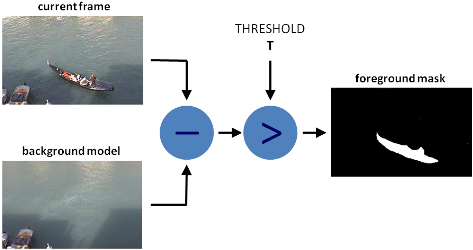

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('backgroundsubtraction.png')
cv2_imshow(img)

Usando o frame e o background abaixo, implemente a operação de subtração de background em OpenCV.

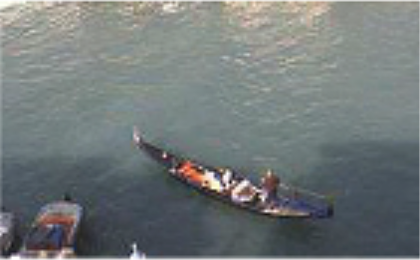

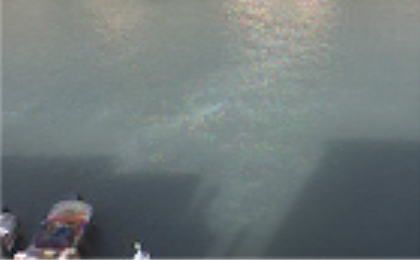

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
frame = cv.imread('frame.png')
#cv2_imshow(frame)
back = cv.imread('background.png')
#cv2_imshow(back)

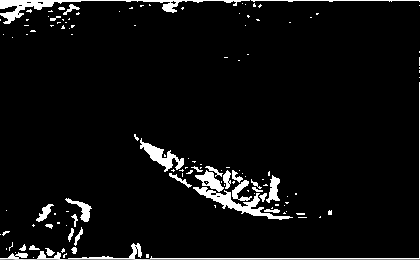

In [ ]:
frameGray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY).astype(np.int32)
backGray = cv.cvtColor(back, cv.COLOR_BGR2GRAY).astype(np.int32)
img_contorno = backGray.copy()

lin,col=backGray.shape
T=40
for l in range(lin-1):
  for c in range(col):
    if abs(frameGray[l][c] - backGray[l][c]) > T:
      img_contorno[l][c] = 255
    else:
      img_contorno[l][c] = 0
cv2_imshow(img_contorno)

**PROBLEMA 4 (3.0 PONTOS).** Abaixo, temos um código em OpenCV que abre uma imagem BGR com três canais de cor, cada cor representada como um número inteiro. 

O sistema de cores CMYK é um sistema de cores subtrativo formado pelas cores Ciano (C), Magenta (M), Amarelo (Y) e Preto (K) e, estas cores, trabalham no intervalo [0.0,1.0]. Abaixo, temos as fórmulas de conversão de RGB para CMYK:


*   K=1-max(R,G,B)/255
*   C=(1-K-R/255)/(1-K)
*   M=(1-K-G/255)/(1-K)
*   Y=(1-K-B/255)/(1-K)

Escreva um programa em OpenCV que converta a imagem BGR para CMYK. Imprima o shape da imagem convertida e exiba os canais gerados.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('lena.png')
print(img.shape)
#cv2_imshow(img)

(512, 512, 3)


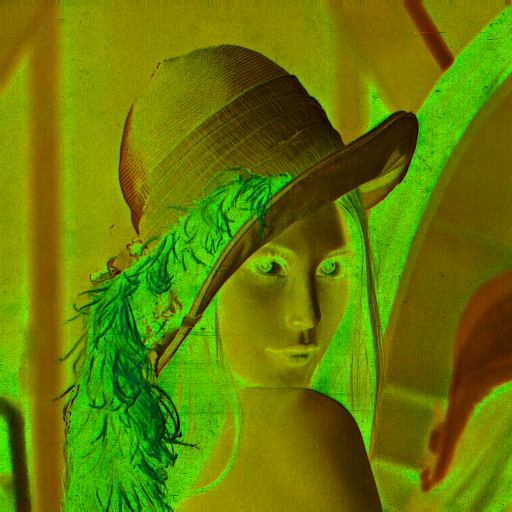

In [55]:
img = img.astype(float)/255
B,G,R =cv.split(img)

lin,col, ch=img.shape
K = R.copy()
C = R.copy()
M = R.copy()
Y = R.copy()

for l in range(lin):
  for c in range(col):
    K[l][c] = 1 - (np.maximum(np.maximum(B[l][c],G[l][c]),R[l][c]))
    C[l][c] = (1 - K[l][c] - R[l][c])/(1 - K[l][c])
    M[l][c] = (1 - K[l][c] - G[l][c])/(1 - K[l][c])
    Y[l][c] = (1 - K[l][c] - B[l][c])/(1 - K[l][c])

impressora = (cv.merge((C,M,Y,K)) * 255)

cv2_imshow(impressora)